In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

## 1. Get the Data

In [2]:
df = pd.read_csv(r'C:\\Users\\...\\full_data_set_v15(May7).csv', sep=';')

In [3]:
#See the full contents of the rows of value
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2. Prepare Data

### 2.1 Data Cleaning

In [4]:
# Replace '\N' values with null value
df = df.replace(r'\N', np.nan)

In [5]:
df = df.replace(r'-', np.nan)

In [6]:
# Remove "$" sign
df= df.replace(r'\$','', regex=True) 

In [7]:
# Remove "%" Sign
df= df.replace(r'\%','', regex=True) 

In [8]:
# Remove "," Sign
df= df.replace(r'\,','', regex=True)

In [9]:
# Remove Object "#NULL!" 
df= df.replace('#NULL!', np.nan)

In [10]:
# Remove \r in BoY, Country  Cluster, ivr
df= df.replace(r'\r','', regex=True) 

In [11]:
# Remove \r in BoY, Country  Cluster, ivr
df= df.replace(r'NaN',np.nan) 

In [12]:
df.head()

,company_info_id,rank,company,year,employees,sector,industry,HQ Location,Website,Years on Global 500 List,revenues_$m,profit_$m,assets_$m,total_stockholder_equity_$m,profit_as_%_of_revenues,profits_as_%_of_assets,profits_as_%_of_stockholder_equity,ceo,Born,BoY,education,country,g_leadership_id,Country Name,Performance Oriented,Autocratic,Modesty,Charismatic 3: Self-sacrifice,Team 1: Collaborative Team Orientation,Decisive,Diplomatic,Face-saver,Charismatic 1: Visionary,Humane-oriented,Integrity,"Bureaucratic, Originally Labeled ??Procedural??",Administratively Competent,Self-centred,Autonomous,Status Conscious,Charismatic 2: Inspirational,Malevolent,Team 2: Team Integrator,"Internally Competitive, Originally Labeled ??Conflict Inducer??",Participative,Charismatic/Value-based Global Leadership Dimension,Team-Oriented Global Leadership Dimension,Self-Protective Global Leadership Dimension,Participative Global Leadership Dimension,Humane-Oriented Global Leadership Dimension,Autonomous Global Leadership Dimension,Country Cluster,g_societal_culture_id,Country Name.1,Uncertainty Avoidance Societal Practices,Future Orientation Societal Practices,Power Distance Societal Practices,Collectivism I Societal Practices (Institutional Collectivism),Humane Orientation Societal Practices,Performance Orientation Societal Practices,Collectivism II Societal Practices (In-group Collectivism),Gender Egalitarianism Societal Practices,Assertiveness Societal Practices,Uncertainty Avoidance Societal Values,Future Orientation Societal Values,Power Distance Societal Values,Collectivism I Societal Values (Institutional Collectivism),Human Orientation Societal Values,Performance Orientation Societal Values,Collectivism II Societal Values (In-group Collectivism),Gender Egalitarianism Societal Values,Assertiveness Societal Values,Country Cluster.1,hofstede_id,ctr,country.1,pdi,idv,mas,uai,ltowvs,ivr
0,1,1.0,Walmart,2019,2200000,Retailing,General Merchandisers,Bentonville Ark.,https://www.walmart.com,25,514405.00,6670.00,219295.00,72496.00,1.3,3,9.2,Doug McMillon,October 17 1966 (age 53 years) Memphis TN,1966.0,Bentonville High School Sam M. Walton College of Business The University of Tulsa University of Arkansas,United States,99,United States,6.46,2.03,5.24,5.16,5.38,5.96,5.46,2.66,6.28,5.19,6.51,3.90,5.63,1.97,3.75,3.60,6.35,1.55,6.03,3.53,5.90,6.12,5.80,3.15,5.93,5.21,3.75,Anglo,99,United States,4.15,4.15,4.88,4.20,4.17,4.49,4.25,3.34,4.55,4.00,5.31,2.85,4.17,5.53,6.14,5.77,5.06,4.32,Anglo,97,USA,United States,40,91,62,46,26,68
1,2,2.0,Sinopec Group,2019,619151,Energy,Petroleum Refining,Beijing,https://www.sinopec.com,21,414649.90,5845.00,329186.30,105181.50,1.4,1.8,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3.0,Royal Dutch Shell,2019,81000,Energy,Petroleum Refining,The Hague,https://www.shell.com,25,396556.00,23352.00,399194.00,198646.00,5.9,5.8,11.8,Ben van Beurden,April 23 1958 (age 62 years) Netherlands,1958.0,Delft University of Technology (1981–1983),Netherlands,56,Netherlands,5.95,2.08,4.71,4.79,5.42,5.87,5.43,2.23,6.30,4.98,6.52,3.22,5.43,1.75,3.53,3.93,6.38,1.62,6.01,3.26,5.59,5.98,5.75,2.87,5.75,4.82,3.53,Germanic Europe,56,Netherlands,4.70,4.61,4.11,4.46,3.86,4.32,3.70,3.50,4.32,3.24,5.07,2.45,4.55,5.20,5.49,5.17,4.99,3.02,Germanic Europe,68,NET,Netherlands,38,80,14,53,67,68
3,4,4.0,China National Petroleum,2019,1382401,Energy,Petroleum Refining,Beijing,https://www.cnpc.com.cn,19,392976.60,2270.50,601899.90,291198.60,0.6,0.4,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5.0,State Grid,2019,917717,Energy,Uti

### 2.2. Exploratory Data Analysis

In [13]:
df.describe()

,company_info_id,rank,year
count,2490.000000,2487.000000,2490.000000
mean,1245.500000,250.660233,2016.997590
std,718.945408,144.530627,1.415915
min,1.000000,1.000000,2015.000000
25%,623.250000,125.000000,2016.000000
50%,1245.500000,251.000000,2017.000000
75%,1867.750000,376.000000,2018.000000
max,2490.000000,500.000000,2019.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2490 entries, 0 to 2489
Data columns (total 82 columns):
company_info_id                                                    2490 non-null int64
rank                                                               2487 non-null float64
company                                                            2488 non-null object
year                                                               2490 non-null int64
employees                                                          2486 non-null object
sector                                                             2487 non-null object
industry                                                           2487 non-null object
HQ Location                                                        2482 non-null object
Website                                                            2487 non-null object
Years on Global 500 List                                           2487 non-null object
revenues_$m   

The most numeric variables are in a format of object.

### 2.3 Feature selection

In [15]:
# drop rows with no values in 'country'
df = df[(df['ceo'].notnull())]

In [16]:
len(df['country'].notnull())

1438

In [17]:
# drop rows with no values in 'country' to make dummy variable 
df_ctry = df[(df['country'].notnull())] 

In [18]:
# Drop rows with no values for Globe project values
df_c = df_ctry[(df_ctry['Country Cluster'].notnull())]

In [19]:
# Drop rows with no values for 'profit_as_%_of_revenues'
df_p = df_c[(df_ctry['profit_as_%_of_revenues'].notnull())]

C:\Users\Jeeho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [20]:
# Drop un necessary columns for ML process
df_ml = df_p.drop(['company_info_id', 'Years on Global 500 List', 'Website','Country Name', 'g_societal_culture_id', 'g_leadership_id',
           'Country Name.1', 'Country Cluster.1', 'hofstede_id', 'ctr', 'country.1','company', 'HQ Location', 'ceo', 'Born', 'education', 'rank',
            'employees', 'revenues_$m', 'profit_$m', 'assets_$m', 'total_stockholder_equity_$m', 'profits_as_%_of_assets', 'profits_as_%_of_stockholder_equity'], axis = 1)

In [21]:
# Drop rows if any of them have null cultural values
df_ml = df_ml[(df_ml['Country Cluster'].notnull())]  #<--- To encode it as one of the categorical variaibles


In [22]:
# Change the data types of numeric values

cols = df_ml.columns.drop(['sector', 'industry', 'country', 'Country Cluster', 'year'])

df_ml[cols] = df_ml[cols].apply(pd.to_numeric, errors='coerce')

In [23]:
len(df_ml)

1112

Check the distributions of the cleaned dataset.

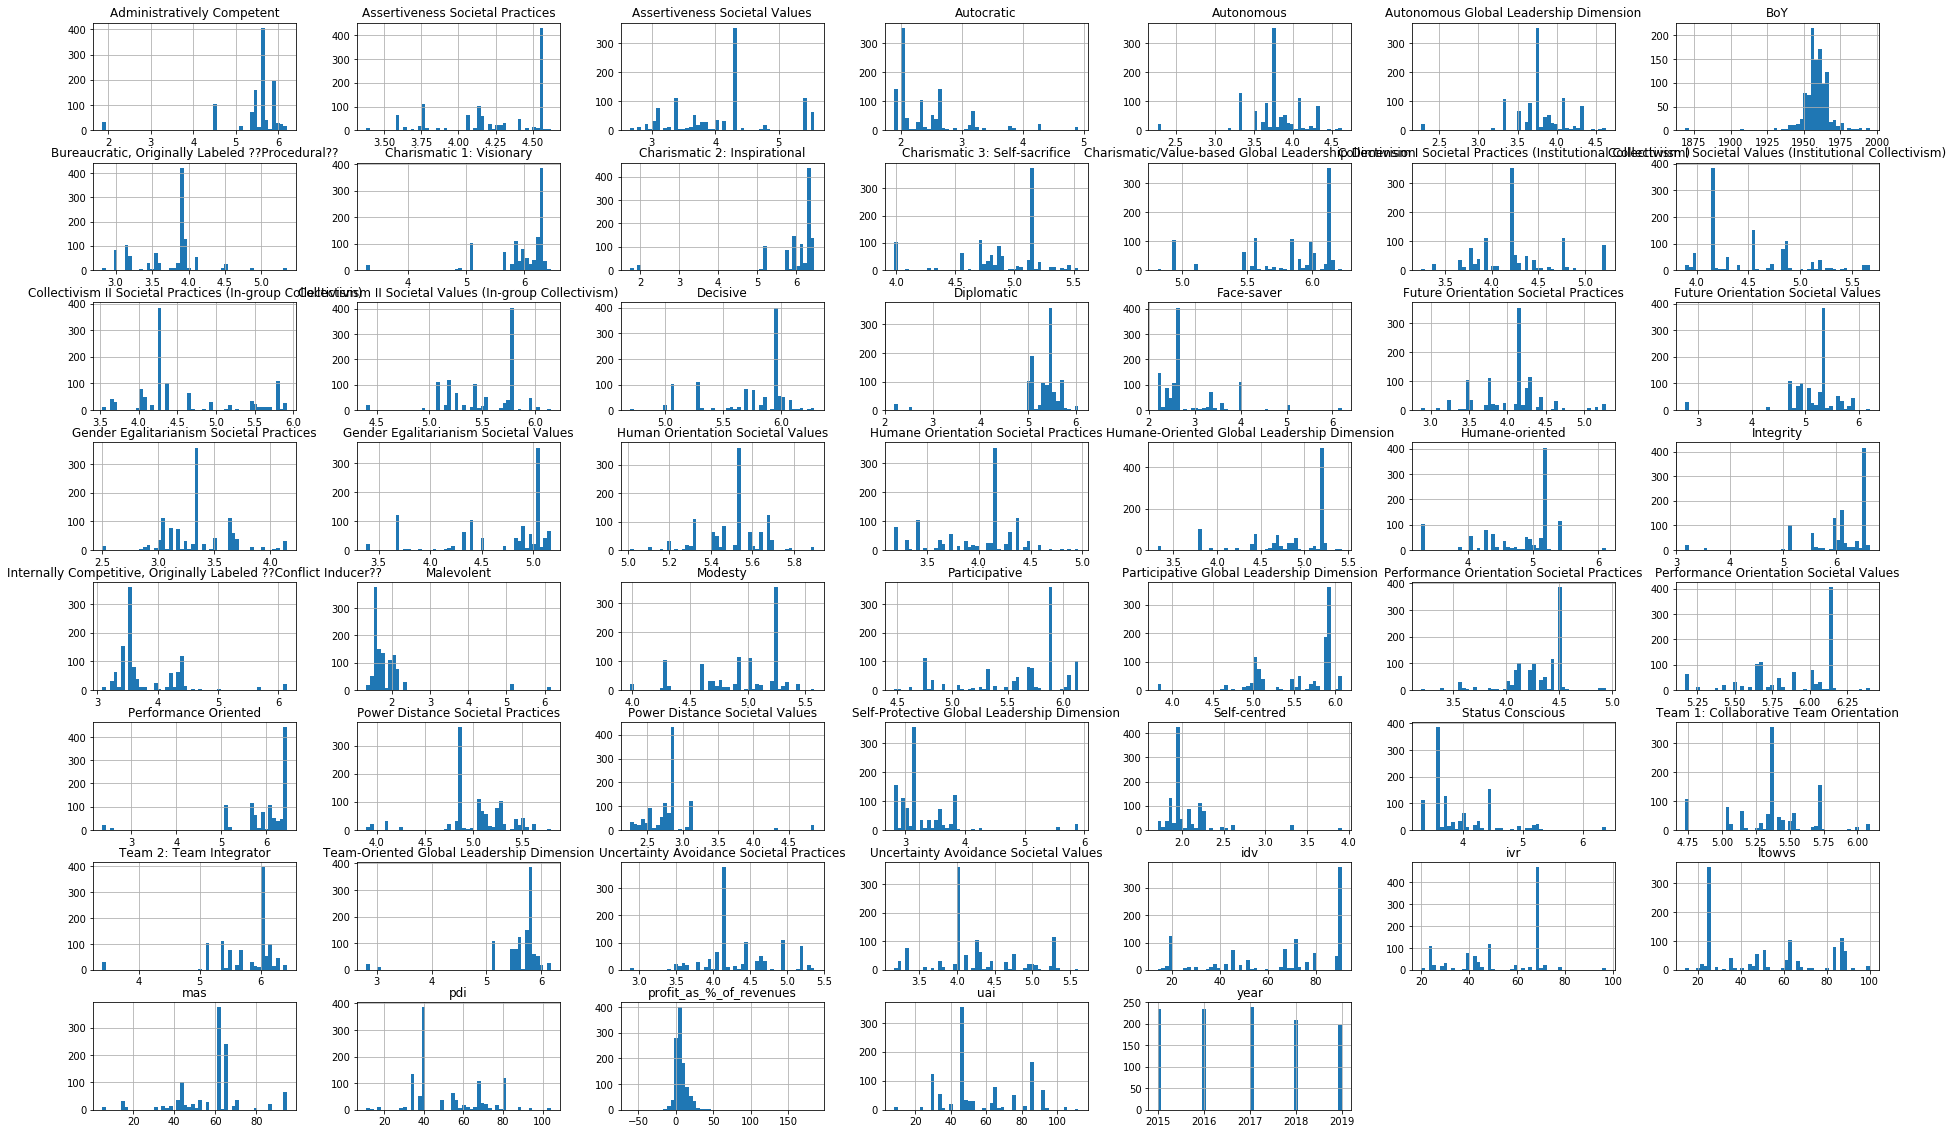

In [24]:
df_ml.hist(bins=50, figsize=(32, 20))
plt.show()

### 2.4 Split Dataset

In [25]:
#Split data set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df_ml, test_size=0.1, random_state=42)

In [26]:
#Drop Label(Target Variable) for training set
df_ml_train = train_set.drop("profit_as_%_of_revenues", axis=1) # drop labels for training set
df_ml_labels = train_set["profit_as_%_of_revenues"].copy()

In [27]:
# Create numeric variables from the training sets
df_ml_num = df_ml_train.drop(['sector', 'industry', 'country', 'Country Cluster', 'year'], axis = 1)

In [28]:
# Cleaning numeric variables
try:
    from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
except ImportError:
    from sklearn.preprocessing import Imputer as SimpleImputer

In [29]:
imputer = SimpleImputer(strategy="median")  

In [30]:
imputer.fit(df_ml_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [31]:
X = imputer.transform(df_ml_num)

In [32]:
df_ml_tr = pd.DataFrame(X, columns=df_ml_num.columns)

In [33]:
#Get categorical values

df_ml_cat = df_ml_train[['sector', 'industry', 'country', 'Country Cluster','year']]

### 2.5 Feature Engineering
- Categorical variables

In [34]:
from sklearn.preprocessing import OrdinalEncoder

cat_encoder = OrdinalEncoder()
df_cat_1hot = cat_encoder.fit_transform(df_ml_cat)
df_cat_1hot

array([[17., 54.,  1.,  1.,  3.],
       [ 9., 48.,  9.,  7.,  2.],
       [ 6.,  4., 10.,  5.,  0.],
       ...,
       [16., 44.,  6.,  2.,  0.],
       [16., 44.,  9.,  7.,  0.],
       [ 6.,  4., 21.,  5.,  1.]])

### 2.6 Feature Scaling 

-  Standardization (Included in 2.6)

### 2.7 All in One Pipeline 
    i. Feature Scaling: Standardization (StandardScaler)
    ii. 1)numeric pipeline=> 3) Full pipeline


In [35]:
# Import the necessary modules for scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [36]:
#Pipeline for numeric features

num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler())
                        ])

df_ml_num_tr = num_pipeline.fit_transform(df_ml_num)

In [37]:
df_ml_num_tr

array([[-0.06304633, -4.91324094,  3.33069042, ...,  0.28993285,
        -0.16058067,  0.51006572],
       [ 0.03946803, -1.18400515, -0.103734  , ...,  1.37919379,
         0.44798681, -0.33760797],
       [-1.08818994,  0.19064017, -0.84096647, ...,  0.38465119,
         1.25941011, -0.80529001],
       ...,
       [-0.26807505,  0.62617136, -0.94885415, ..., -0.42045473,
        -0.64743465,  0.83159713],
       [-0.57561813, -1.18400515, -0.103734  , ...,  1.37919379,
         0.44798681, -0.33760797],
       [ 0.65455419, -0.02712543, -0.60720983, ..., -0.18365887,
         0.61027147,  0.83159713]])

In [38]:
# create pipeline for categorical features
# Latest Version
from sklearn.compose import ColumnTransformer

num_attribs = list(df_ml_num)
cat_attribs = ['sector', 'industry', 'country', 'Country Cluster', 'year']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_encoder, cat_attribs),
    ])

df_ml_prepared = full_pipeline.fit_transform(df_ml_train)

In [39]:
df_ml_prepared

array([[-0.06304633, -4.91324094,  3.33069042, ...,  1.        ,
         1.        ,  3.        ],
       [ 0.03946803, -1.18400515, -0.103734  , ...,  9.        ,
         7.        ,  2.        ],
       [-1.08818994,  0.19064017, -0.84096647, ..., 10.        ,
         5.        ,  0.        ],
       ...,
       [-0.26807505,  0.62617136, -0.94885415, ...,  6.        ,
         2.        ,  0.        ],
       [-0.57561813, -1.18400515, -0.103734  , ...,  9.        ,
         7.        ,  0.        ],
       [ 0.65455419, -0.02712543, -0.60720983, ..., 21.        ,
         5.        ,  1.        ]])

In [40]:
df_ml_prepared.shape

(1000, 57)

## 3. Build and Evaluate Models

### 3.1 Train Many Models

#### 3.1.1. Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_ml_prepared, df_ml_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# let's try the full preprocessing pipeline on a few training instances
some_data = df_ml.iloc[:5]
some_labels = df_ml_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [9.73894854 6.85327438 8.98517365 9.30041047 5.44524801]


C:\Users\Jeeho\Anaconda3\lib\site-packages\sklearn\compose\_column_transformer.py:430: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  FutureWarning)


In [43]:
#Compare against the actual values:

print("Labels:", list(some_labels))

Labels: [3.6, 33.6, 3.6, 10.7, 3.8]


It works, although the predictions are not exactly accurate. RMSE is used here to check the error instead of MSE since there are too many outliers.

In [44]:
from sklearn.metrics import mean_squared_error
df_ml_predictions = lin_reg.predict(df_ml_prepared)
lin_mse = mean_squared_error(df_ml_labels, df_ml_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.306906676729213

In [45]:
lin_reg.score(df_ml_prepared, df_ml_labels)

0.09698146859516887

In [46]:
# Check the mean of label feature
t = train_set['profit_as_%_of_revenues'].astype(float)

In [47]:
t.mean()

6.939000000000002

#### 3.1.2. Decision Tree Regressor

In [48]:
# Try Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_ml_prepared, df_ml_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [49]:
df_ml_tree_predictions = tree_reg.predict(df_ml_prepared)
tree_mse = mean_squared_error(df_ml_labels, df_ml_tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.975689499789764

In [50]:
tree_reg.score(df_ml_prepared, df_ml_labels)

0.9900754869531857

#### 3.1.3. Lasso Regression

In [51]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [52]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(df_ml_prepared, df_ml_labels)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
df_ml_lasso_predictions = lasso_reg.predict(df_ml_prepared)
lasso_mse = mean_squared_error(df_ml_labels, df_ml_lasso_predictions)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

9.466951040700284

In [54]:
lasso_reg.score(df_ml_prepared, df_ml_labels)

0.06565727844850267

#### 3.1.4. Elastic-Net Regression

In [55]:
from sklearn.linear_model import ElasticNet

Elastic_reg = ElasticNet(alpha=1, l1_ratio=0.5)
Elastic_reg.fit(df_ml_prepared, df_ml_labels)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
df_ml_elastic_predictions = Elastic_reg.predict(df_ml_prepared)
elastic_mse = mean_squared_error(df_ml_labels, df_ml_elastic_predictions)
elastic_rmse = np.sqrt(elastic_mse)
elastic_rmse

9.677561751900443

In [57]:
Elastic_reg.score(df_ml_prepared, df_ml_labels)

0.02362231077648369

#### 3.1.5. Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(df_ml_prepared, df_ml_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
df_ml_forest_predictions = forest_reg.predict(df_ml_prepared)
forest_mse = mean_squared_error(df_ml_labels, df_ml_forest_predictions)
forest_rmse = np.sqrt(lasso_mse)
forest_rmse

9.466951040700284

In [60]:
forest_reg.score(df_ml_prepared, df_ml_labels)

0.8571457755115948

After training 5 different models, It shows that __Decision Tree Regressor__ and __Random Forest Regressor__ present the highest and second highest accuracy scores as __0.98__ and __0.85__ respectively. For errors, __Decision Tree Regressor__  shows the lowest RMSE as __0.990__, while __Random Forest Regression__ shows higher RMSE as __9.467__.

In [61]:
#Top 10 imfortant features of Decision Tree Regression model
attribs = num_attribs + cat_attribs
sorted(zip(tree_reg.feature_importances_, attribs), reverse=True)[:10]

[(0.46135952372528377, 'industry'),
 (0.1628618590187202, 'BoY'),
 (0.1367076432925819, 'year'),
 (0.08387660776130022, 'sector'),
 (0.032726181610428125, 'Team-Oriented Global Leadership Dimension'),
 (0.016005007115004, 'Performance Orientation Societal Values'),
 (0.009876601642866769, 'Charismatic/Value-based Global Leadership Dimension'),
 (0.00678883061274633, 'Performance Orientation Societal Practices'),
 (0.00634176676863566, 'Charismatic 3: Self-sacrifice'),
 (0.006195905941021996, 'Self-centred')]

In [62]:
#Top 10 imfortant features of Random Forest Regression model
sorted(zip(forest_reg.feature_importances_, attribs), reverse=True)[:10]

[(0.3595354299551021, 'industry'),
 (0.17060137456230198, 'BoY'),
 (0.13484567494754277, 'year'),
 (0.07022648699788474, 'sector'),
 (0.02342872156821216, 'Team-Oriented Global Leadership Dimension'),
 (0.015414539153872642, 'ivr'),
 (0.011470250900535939, 'Performance Orientation Societal Values'),
 (0.008889318386182158, 'country'),
 (0.008314210466534192, 'Team 1: Collaborative Team Orientation'),
 (0.007898271091693991, 'Modesty')]

While those two models show same order of categorical features, for cultural values, those two have different order of important features.


### 3.2 Measure and compare their performances using Cross-Validation

#### 3.2.1. Decision Tree Regression

In [63]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())   

In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, df_ml_prepared, df_ml_labels,
        scoring="neg_mean_squared_error", cv=10)

rmse_scores = np.sqrt(-scores)

display_scores(rmse_scores)

Scores: [11.2710991  10.84212272  9.89421801  8.90838229 21.11993194  9.65612759
 12.39418412  8.09029357 10.37075214 10.47392596]
Mean: 11.302103743042982
Standard deviation: 3.465331655338891


In [65]:
tree_r_squared = cross_val_score(tree_reg, df_ml_prepared, df_ml_labels, scoring='r2', cv=10).mean()

tree_r_squared

-0.7371539593526564

#### 3.2.2. Linear Regression

In [66]:
# Linear Regression
lin_scores = cross_val_score(lin_reg, df_ml_prepared, df_ml_labels,
            scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)


Scores: [ 9.03572984  9.4745749   6.52076354  7.03623154 19.68260993  8.70844333
  6.40948454  6.50907049  9.98347471  9.19990529]
Mean: 9.256028810437915
Standard deviation: 3.7107928467202047


In [67]:
lin_r_squared = cross_val_score(lin_reg, df_ml_prepared, df_ml_labels, scoring='r2', cv=10).mean()

lin_r_squared

-0.05520606195041976

#### 3.2.3 Lasso Regression

In [68]:
# Lasso Regression

lasso_scores = cross_val_score(lasso_reg, df_ml_prepared, df_ml_labels,
            scoring="neg_mean_squared_error", cv=10)

lasso_rmse_scores = np.sqrt(-lasso_scores)
display_scores(lasso_rmse_scores)


Scores: [ 9.06283004  9.66428128  6.34157014  6.92022081 19.49185428  8.65695028
  6.28021504  6.24077435  9.77412545  9.1924052 ]
Mean: 9.162522686635963
Standard deviation: 3.7069845904378735


In [69]:
lasso_r_squared = cross_val_score(lasso_reg, df_ml_prepared, df_ml_labels, scoring='r2', cv=10).mean()

lasso_r_squared

-0.02929112830122521

####  3.2.4. Elastic-Net Regression

In [70]:
elastic_scores = cross_val_score(Elastic_reg, df_ml_prepared, df_ml_labels,
            scoring="neg_mean_squared_error", cv=10)

elastic_rmse_scores = np.sqrt(-elastic_scores)
display_scores(elastic_rmse_scores)

Scores: [ 8.99681977  9.60598349  6.30732227  6.70472925 19.58420963  8.42934961
  6.21595038  6.28198357  9.1898949   9.30531638]
Mean: 9.06215592646104
Standard deviation: 3.74788384088017


In [71]:
elastic_r_squared = cross_val_score(Elastic_reg, df_ml_prepared, df_ml_labels, scoring='r2', cv=10).mean()

elastic_r_squared

-0.002803550720474346

#### 3.2.5. Random Forest Regression

In [72]:
forest_scores = cross_val_score(forest_reg, df_ml_prepared, df_ml_labels,
            scoring="neg_mean_squared_error", cv=10)

forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [ 8.72700949  9.42382974  6.69693445  5.688807   19.70733261  6.92055152
  7.88583473  6.17964336  9.09584255  8.44838295]
Mean: 8.877416840326074
Standard deviation: 3.805946923441379


In [73]:
forest_r_squared = cross_val_score(forest_reg, df_ml_prepared, df_ml_labels, scoring='r2', cv=10).mean()

forest_r_squared

0.010854518664759217

All models have negative r squared values.

### 3.3 Analyze the most significant variables for each algorithm

#### 3.3.1 Check standardized regression coefficients (which is after standardization of data)


### 3.4 The most promising model
 

Random Forest Regression model

## 4. Fine-tune the models

### 4.1. Fine-tune the hyperparameters using cross-validation
- GridSearch CV 

In [74]:
# GridSearch CV for Random Forest Regression
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

# train across 10 folds, that's a total of (12+6)*10=180 rounds of training 
grid_forest = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_forest.fit(df_ml_prepared, df_ml_labels)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_job

In [75]:
# The best parameters 
grid_forest.best_params_

{'max_features': 4, 'n_estimators': 30}

In [76]:
grid_forest.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [77]:
#Check the parameters
cvres = grid_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

10.772640918681143 {'max_features': 2, 'n_estimators': 3}
10.166532189660442 {'max_features': 2, 'n_estimators': 10}
10.099786042080307 {'max_features': 2, 'n_estimators': 30}
10.840960317326681 {'max_features': 4, 'n_estimators': 3}
10.166844841124508 {'max_features': 4, 'n_estimators': 10}
9.91462852497834 {'max_features': 4, 'n_estimators': 30}
10.890534976622337 {'max_features': 6, 'n_estimators': 3}
10.126524272280783 {'max_features': 6, 'n_estimators': 10}
9.940551513550645 {'max_features': 6, 'n_estimators': 30}
10.69224755068761 {'max_features': 8, 'n_estimators': 3}
10.109854692960615 {'max_features': 8, 'n_estimators': 10}
9.97290580157285 {'max_features': 8, 'n_estimators': 30}
11.549492232705873 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
10.574785032094033 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
10.48238543674313 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
10.228926215639646 {'bootstrap': False, 'max_features': 3, 'n_estima

In [78]:
# The feature importances
feature_importances = grid_forest.best_estimator_.feature_importances_
feature_importances

array([0.25698988, 0.01479378, 0.00183234, 0.00557651, 0.00142633,
       0.00391601, 0.00201299, 0.00157027, 0.00118384, 0.00453499,
       0.00247628, 0.00289893, 0.00069285, 0.00107619, 0.00093849,
       0.00124784, 0.00126893, 0.00424576, 0.01229267, 0.00322947,
       0.00133214, 0.00205531, 0.00290178, 0.00404491, 0.00074333,
       0.00504833, 0.00633746, 0.0005075 , 0.00280763, 0.00186095,
       0.00126003, 0.0014041 , 0.00169968, 0.00535985, 0.00394239,
       0.00151609, 0.00262938, 0.00235933, 0.00143414, 0.00379341,
       0.00426077, 0.00504192, 0.00373162, 0.0028472 , 0.00451653,
       0.00161213, 0.00297532, 0.00291195, 0.00088326, 0.00208415,
       0.00287922, 0.00291596, 0.15023072, 0.24165444, 0.00166652,
       0.00083594, 0.19171025])

In [79]:
# Feature importances including numeric features and categorical features
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + cat_one_hot_attribs


In [80]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2569898839325227, 'BoY'),
 (0.24165443766500502, 'Apparel'),
 (0.19171024822551752, 'Energy'),
 (0.15023072004469495, 'Aerospace & Defense'),
 (0.014793778480076965, 'Performance Oriented'),
 (0.012292665293815362, 'Malevolent'),
 (0.006337458957238241, 'Humane-Oriented Global Leadership Dimension'),
 (0.005576505059568426, 'Modesty'),
 (0.005359851706081211, 'Performance Orientation Societal Practices'),
 (0.005048327036355898, 'Participative Global Leadership Dimension'),
 (0.005041918134408647, 'Human Orientation Societal Values'),
 (0.004534988571224808, 'Charismatic 1: Visionary'),
 (0.0045165345496438565, 'Gender Egalitarianism Societal Values'),
 (0.004260774879688476,
  'Collectivism I Societal Values (Institutional Collectivism)'),
 (0.004245758005782923, 'Charismatic 2: Inspirational'),
 (0.004044912417438393, 'Team-Oriented Global Leadership Dimension'),
 (0.003942388846319474,
  'Collectivism II Societal Practices (In-group Collectivism)'),
 (0.0039160106495873285, 'Tea

In [83]:
final_model = grid_forest.best_estimator_

X_test = test_set.drop("profit_as_%_of_revenues", axis=1)
y_test = test_set["profit_as_%_of_revenues"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [84]:
final_rmse

6.281349886427526

In [85]:
from sklearn.metrics import r2_score

r2_score(y_test,final_predictions)

-0.10078244464049257

In [86]:
final_model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=4, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

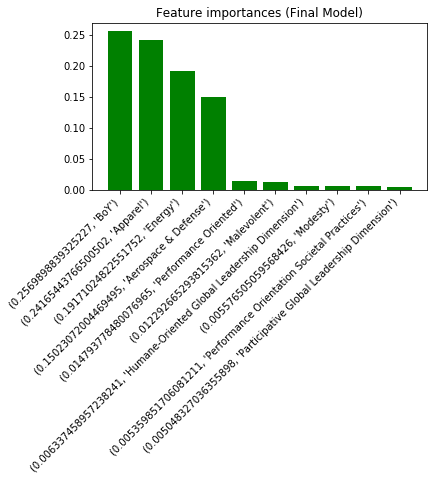

In [87]:
# show feature importance only includinig cultural features and Birth of Year
coef = sorted(zip(feature_importances, attributes), reverse=True)

final_coef = final_model.feature_importances_
indices = np.argsort(final_coef)[::-1]

plt.figure()
plt.title("Feature importances (Final Model)")
plt.bar(range(10), final_coef[indices[:10]],
       color="g", align="center")
plt.xticks(range(10), coef, rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)
plt.ion(); plt.show()